# Notes from Getting Started with Natural Language Processing  (2022)
## by Ekaterina Kochmar 
### https://www.manning.com/books/getting-started-with-natural-language-processing#toc

### Ch. 1 Introduction

A particular representation that you will often come across in NLP is called a *vector*. Vector representations are ubiquitous and can represent characters, words, and documents, etc. In Python, they are like array notation. 

Let's start a query for "management" and "meeting" in two different documents. This will create two dimensions `(management, meeting)`. Here, we are doing simple counts and weighing them equally. 

In [ ]:
# str to represent doc1
doc1 = "meeting... management... meeting... management... meeting... "
doc1 += "management... meeting... meeting"

# setting vector at 0,0 (at origin) 
vector_1 = [0,0]

#for loop with two conditionals (one for each word in query) 
# for "management" we are increasing our first index by the number of times the word appear in doc1
# for "meeting" we are doing the same, but for the second index 
for word in doc1.split("... "):
  if word == "management":
    vector_1[0] = vector_1[0] + 1 
  if word == "meeting":
    vector_1[1] = vector_1[1] + 1

#In doing so, we now have vector / coordinate
print(vector_1)

[3, 5]


In [ ]:
#repeat the same steps as above for doc2
doc2 = "management... meeting... management... management... management"

vector_2 = [0,0]

for word in doc2.split("... "):
  if word == "management":
    vector_2[0] = vector_2[0] + 1 
  if word == "meeting":
    vector_2[1] = vector_2[1] + 1

print(vector_2)

[4, 1]


We can think of vectors as two points on a graph where "management" is the x-axis and "meeting" is the y-axis. (3,5) is the point for doc1 and (1,1) is our starting query and the distance between them can tell us a little bit about there relationship. We can figure out that distance using the Pythagorean theorem (a<sup>2</sup>+b<sup>2</sup>=c<sup>2</sup>). 

The *Euclidian Distance* bwtween two points in space is measured as the length of the line between those points. In NLP, it can be used to measure the *similarity* between two text (i.e., the distance bwtween two vectors representing these texts). 
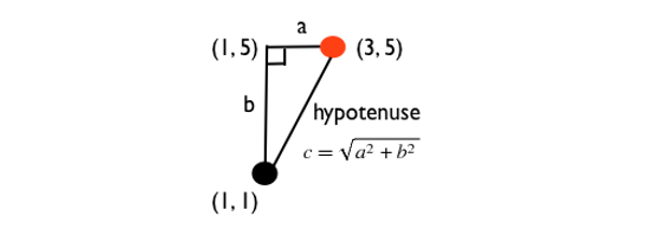

In [ ]:
#Euclidian distance for doc1 and query 
import math
ED_doc1 = math.sqrt((3-1)**2 + (5-1)**2)
print(ED_doc1)

4.47213595499958


In [ ]:
#Euclidian distance for doc2 and query
ED_doc2 = math.sqrt((4-1)**2 + (1-1)**2)
print(ED_doc2)

3.0


In this example, there are only two dimensions because there are only two words in the query. However, it is likely that we will eventually have/need more. In turn, we can calculate for more dimensions by taking the square root of the sum of the squared lengths in each dimension.

In [ ]:
# variables for doc1 vector and setting our length to 0 
query = [1, 1]
doc1 = [3,5]
sq_length = 0 

# For loop that takes the length of the query as its range
# then calculates for each index, then takes sqrt of the length outside the for loop
# Note: pow takes two arguments. The first is the number and the second is the power it will be raised to. 
for index in range(0, len(query)):
  sq_length += math.pow((doc1[index] - query[index]), 2)

print(math.sqrt(sq_length))

4.47213595499958


In [23]:
# hard coded version of above to demo what the iteration is doing
import math
index_1 = math.pow((3-1), 2)
index_2 = math.pow((5-1), 2)
sq_len = index_1 + index_2
print(math.sqrt(sq_len))



4.47213595499958


In [ ]:
# variables for doc2 vector and setting our length to 0 
query = [1, 1]
doc2 = [1,4]
sq_length = 0 

for index in range(0, len(query)):
  sq_length += math.pow((doc2[index] - query[index]), 2)

print(math.sqrt(sq_length))

3.0


Note: Vectors representing documents can get longer without any conceptually interesting reason. For example, longer documents will have longer vectors: each word in a longer document has a higher chance of occurrence and will most likely have higher counts. Therefore, it is much more informative to measure not the absolute distance that can be dependent on the length of the documents, but the angle between the length-normalized vectors, that is, vectors made comparable in terms of their lengths. **The angle between the vectors is a much more stable measure than the length.**

The measure that helps estimate the angle between vectors is called *cosine similarity*, and it has a nice property of being higher when the two vectors are closer to each other with a smaller angle (i.e., more similar), and lower when they are more distant with a larger angle (i.e., less similar). The cosine of a 0$^{\circ}$ angle equals 1, meaning maximum closeness and similarity between the two vectors.

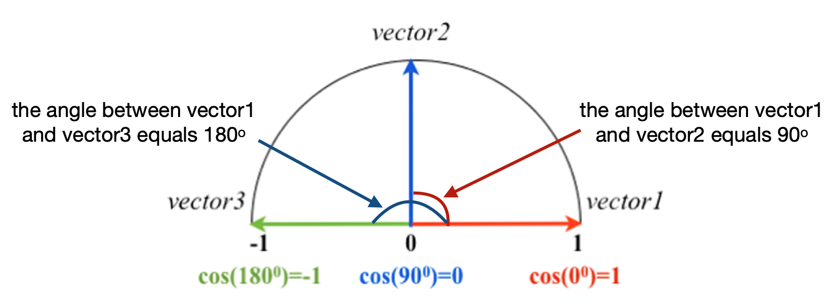

##### COSINE SIMILARITY
Cosine similarity estimates the similarity between two non-zero vectors in space (or two texts represented by such vectors) on the basis of the angle between these vectors: e.g., the cosine of 0$^{\circ}$ equals 1, which denotes the maximum similarity, and the cosine of 180$^{\circ}$ equals -1, which is the lowest value. **Unlike Euclidean distance, this measure is not affected by vector length.**

Vector1 in Figure 1.11 has an angle of 0$^{\circ}$ with itself as well as with any overlapping vectors, so the cosine of this angle equals 1 showing maximum similarity.

Vector1 has word occurrences along x-axis, but not along y-axis, while vector2 has word occurrences along y-axis but not along x-axis. The two vectors represent content complementary to each other: to put this in context, you can imagine that vector1 represents one query consisting of a single word “management”, and vector2 represents another query consisting of a single word “meeting”. 

Vectors 1 and 3 are at 180 to each other and have a cosine of -1. In tasks based on simple word counting, the cosine will never be negative because the vectors that take the word occurrences as their coordinates will not produce negative coordinates, so vector3 cannot represent a query or a document.

When we build vectors based on word occurrence counts, the cosine similarity will range between 0 for the least similar.

**When we build vectors based on word occurrence counts, the cosine similarity will range between 0 for the least similar (perpendicular, or orthogonal) vectors and 1 for the most similar, in extreme cases overlapping, vectors.**

#Finding the Cosine

The estimation of the cosine of an angle relies on another Euclidean space estimation: dot product between vectors. Dot product is simply the sum of the coordinate products of the two vectors taken along **each** dimension, for example:

In [ ]:
dot_product1 = 1*3 + 1*5  #query and doc1
dot_product2 = 1*4 + 1*1  #query and doc2
dot_product3 = 3*4 + 5*1  #doc1 and doc2

print(dot_product1)
print(dot_product2) 
print(dot_product3)

8
5
17


The cosine similarity is estimated as a dot product between two vectors divided by the product of their lengths. The length of a vector is calculated in exactly the same way as we did before for the distance, but instead of the difference in coordinates between two points, we take the difference between the vector coordinates and the origin of the coordinate space, which is always (0,0).

In [ ]:
import math
len_query = math.sqrt((1-0)**2 + (1-0)**2)
len_query

1.4142135623730951

In [ ]:
len_doc1 = math.sqrt((3-0)**2 + (5-0)**2)
len_doc1

5.830951894845301

In [ ]:
len_doc2 = math.sqrt((4-0)**2 + (1-0)**2)
len_doc2

4.123105625617661

Now, add the cosine similaries: 

In [ ]:
cs_query_doc1 = dot_product1/(len_query*len_doc1)
cs_query_doc1

0.9701425001453319

In [ ]:
cs_query_doc2 = dot_product2/(len_query*len_doc2)
cs_query_doc2

0.8574929257125441

Cosine Similarity Calculation

In [ ]:

import math

# vectors for starting query (two words, "management" and "meeting"), doc1, doc2
query = [1, 1]
doc1 = [3, 5]
doc2 = [1,4]

def length(vector):
    sq_length = 0
    for index in range(0, len(vector)):
        sq_length += math.pow(vector[index], 2)
    return math.sqrt(sq_length)

length(query)
    
def dot_product(vector1, vector2):
    if len(vector1)==len(vector2):
        dot_prod = 0
        for index in range(0, len(vector1)):
            dot_prod += vector1[index]*vector2[index]
        return dot_prod
    else:
        return "Unmatching dimensionality"
 
cosine1=dot_product(query, doc1)/(length(query)*length(doc1))
cosine2=dot_product(query, doc2)/(length(query)*length(doc2))
print("Cosine of doc1 is " + str(cosine1) + ".")
print("Cosine of doc2 is " + str(cosine2) + ".")

      

Cosine of doc1 is 0.9701425001453319.
Cosine of doc2 is 0.8574929257125441.


So, in fact, when the length of the documents is disregarded, Doc1 is much more similar to the query than Doc2. Why is that? This is because rather than being closer only in distance, Doc1 is more similar to the query – the content in the query is equally balanced between the two terms, and so is the content in Doc1. In contrast, there is a higher chance that Doc2 is more about “management” in general than about “management meetings”, as it mentions meeting only once.

## Exercise: 

Calculate cosine similarity between each pair of vectors: A=[4,3], B=[5,5], and C=[1,10]. Which ones are closest (most similar) to each other?

First, try solving this exercise. Then you can compare your answer to the solution below. Represent the vectors visually in a geometrical space to check your intuition about distance.

In [ ]:
A = [4,3]
B = [5,5]
C = [1,10]

#find doc product between vectors
dot_product_AB = 4*5 + 3*5
dot_product_BC = 5*1 + 5*10
dot_product_CA = 1*4 + 10*3

print(dot_product_AB)
print(dot_product_AC)
print(dot_product_BC)

print("-----")

# find length
len_A = math.sqrt((4-0)**2 + (3-0)**2)
len_B = math.sqrt((5-0)**2 + (5-0)**2)
len_C = math.sqrt((1-0)**2 + (10-0)**2)

print(len_A)
print(len_B)
print(len_C)

print("-----")

#find cosine
cs_AB = dot_product_AB/(len_A*len_B)
cs_BC = dot_product_BC/(len_B*len_C)
cs_CA = dot_product_CA/(len_C*len_A)

print(cs_AB)
print(cs_BC)
print(cs_CA)

#A and B are the closest


35
34
55
-----
5.0
7.0710678118654755
10.04987562112089
-----
0.9899494936611665
0.773957299203321
0.6766252893427926
